In [26]:
from typing import Callable, Iterable, List
from random import randint
from functools import lru_cache
from matplotlib import pyplot as plt
from datetime import datetime
import random
import math


class Input:
	_id: int = 1
	def __init__(self, custom_id=None) -> None:
		if custom_id is not None:
			self.id = str(custom_id)
		else:
			self.id = str(Input._id)
			Input._id += 1
	
	def calc(self, t: int) -> float:
		raise NotImplementedError()
	
class Neuron(Input):
	_id: int = 1
	def __init__(
			self,
			f: Callable[[float], float],
			offset: float = 0,
			inputs: List[Input]|None = None,
			weights: List[float]|None = None,
	) -> None:
		if inputs is None:
			inputs = []
		if weights is None:
			weights = []
		
		if len(inputs) != len(weights):
			raise ValueError("weights' len and inputs' len mismatch")
		
		super().__init__(f"n{Neuron._id}")
		Neuron._id += 1

		self._offset = offset
		self._f = f
		self._inputs = inputs
		self._weights = weights
		
	
	def add_input(self, input: Input, weight: float):
		self._weights.append(weight)
		self._inputs.append(input)

	@lru_cache
	def calc(self, t: int):
		if t <= 0:
			return 0
		
		h: float = self._offset
		for w, i in zip(self._weights, self._inputs):
			h += w * i.calc(t-1)
		return self._f(h)
	
	def __repr__(self) -> str:
		return  "Neuron(id={}, offset={}, weights={}, input_ids={})".format(
			self.id,
			self._offset,
			self._weights,
			list(map(lambda n: n.id, self._inputs))
		)
	

class InitialInput(Input):
	_id = 1
	def __init__(self, f: Callable[[int], float]) -> None:
		super().__init__(f"x{InitialInput._id}")
		InitialInput._id += 1
		self.f = f

	def calc(self, t):
		return self.f(t)


def relu(x: float) -> float:
	if(x < 0):
		return 0
	return x


def init(neurons_count: int) -> List[Neuron]:
	neurons = [
		Neuron(
			relu,
			random.uniform(-10, 10)
		)
		for _ in range(neurons_count)
	]
	for n in neurons:
		for input_neuron in random.sample(neurons, k=randint(1, len(neurons))):
			n.add_input(
				input_neuron,
				random.uniform(-1.5, 1.5)
			)
	return neurons

def calc_y(neurons: List[Neuron], t_range: Iterable[int]) -> List[List[float]]:
	y: List[List[float]] = [[] for _ in range(len(neurons))]
	for t in t_range:
		for i in range(len(neurons)):
			y[i].append(neurons[i].calc(t))
	return y

def plot_y_from_t(y: List[List[float]]) -> None:
	grid_size = math.ceil(len(y)**(1/2))
	for i in range(len(y)):
		plt.subplot(grid_size, grid_size, i+1)
		plt.scatter(range(len(y[0])), y[i], label=f"y_{i}(t)")
		plt.legend()
	plt.show()

def plot_yi_from_yj(y: List[List[float]]) -> None:
	grid_size = len(y)
	for i in range(len(y)):
		for j in range(len(y)):
			plt.subplot(grid_size, grid_size, i*grid_size+j+1)
			plt.scatter(y[i], y[j], label=f"y_{i}(y_{j})")
			plt.legend()
	plt.show()

random.seed(datetime.now().timestamp())

In [27]:
#regen
# neurons = init(4)
neurons = [
    Neuron(relu, random.uniform(-10, 10))
    for _ in range(4)
]

neurons[0].add_input(neurons[3], 0.4093876082943505)
neurons[0].add_input(neurons[1], -0.15716475730436485)
neurons[0].add_input(neurons[0], -0.44808502549255236)

neurons[1].add_input(neurons[0], 0.486224410105623)
neurons[1].add_input(neurons[1], -0.2339345432978326)
neurons[1].add_input(neurons[3], -1.1637124497545512)

neurons[2].add_input(neurons[0], -0.23473572784347385)
neurons[2].add_input(neurons[1], 0.47279203488043975)
neurons[2].add_input(neurons[2], -0.7625368940180011)

neurons[3].add_input(neurons[2], -0.34608500832907385)

print(*neurons, sep='\n')
y = calc_y(neurons, range(10000))

Neuron(id=n1, offset=3.0016555212047376, weights=[0.4093876082943505, -0.15716475730436485, -0.44808502549255236], input_ids=['n4', 'n2', 'n1'])
Neuron(id=n2, offset=-3.0282251318378712, weights=[0.486224410105623, -0.2339345432978326, -1.1637124497545512], input_ids=['n1', 'n2', 'n4'])
Neuron(id=n3, offset=-7.551615798735874, weights=[-0.23473572784347385, 0.47279203488043975, -0.7625368940180011], input_ids=['n1', 'n2', 'n3'])
Neuron(id=n4, offset=-7.135607479116204, weights=[-0.34608500832907385], input_ids=['n3'])


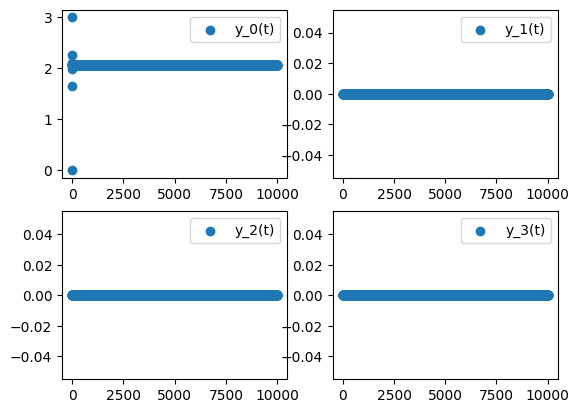

In [28]:
plot_y_from_t(y)

In [29]:
# plt.scatter(y[2], y[3], label=f"y_3(y_2)")
# plt.show()

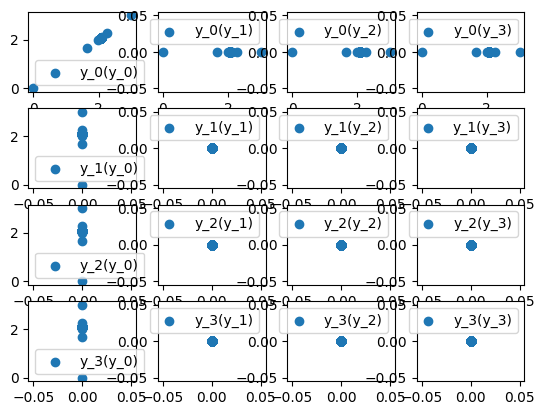

In [30]:
plot_yi_from_yj(y)